In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [2]:
def metropolis_algorithm(uniform_rng, chain_start, n, logtarget, drawproposal):
    x = chain_start
    chain = np.zeros(n)
    accepted = 0
    for i in range(n):
        candidate = drawproposal(x)
        
        if np.log(uniform_rng.uniform()) < logtarget(candidate) - logtarget(x):
            x = candidate
            accepted += 1
        
        chain[i] = x
        
    print(f"Acceptance rate {accepted/n}")
    return chain

In [3]:
uniform_rng = RandomState(1729)
proposal_rng = RandomState(2)
chain = metropolis_algorithm(uniform_rng, 10, 10000, lambda x: -np.abs(x), lambda x: x + 2.5*proposal_rng.normal())


Acceptance rate 0.4703


In [4]:
chain = chain[chain.size // 2:]

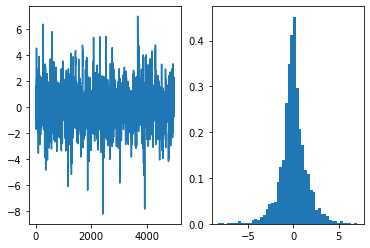

In [5]:
fig, ax = plt.subplots(1, 2)
ax[0].plot(chain)
h = ax[1].hist(chain, 50, density=True)
plt.show()